<a href="https://colab.research.google.com/github/oogong/sentiment-analysis/blob/main/sentiment_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정분석 샘플

In [ ]:
text = "나 때는 말이야 삼성이 5만원이었는데 말야"

client_id = "--"  # client id를 꼭 넣어주세요!
client_secret = "--"  # client seceret을 꼭 넣어주세요!
url = "https://naveropenapi.apigw.ntruss.com/sentiment-analysis/v1/analyze"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type": "application/json"
}
data = {
    "content": text[:min(len(text), 900)]
}
response = requests.post(url, data=json.dumps(data), headers=headers)
result = json.loads(response.text)
print("감성분석 결과 :", result,  result["document"]["sentiment"])

# 네이버 종토방 데이터 감정분석

In [ ]:
import json
import requests
from google.colab import drive
import time
import pandas as pd
import csv

results = [['']*7 for _ in range(4000)]

data = pd.read_csv('네이버-감정-데이터2.csv')

data=data.iloc[:,:6]

client_id = "--"  # client id
client_secret = "--"  # client seceret
url = "https://naveropenapi.apigw.ntruss.com/sentiment-analysis/v1/analyze"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type": "application/json"
}


sep_api = [[209, 999], [960, 1960], [1960, 2960], [2954, 3100], [3100, 4000], [3660, 4000], [3658, 3660]]
api_num = 6
code_tmp = data['code']
text_tmp = data['comment']

# print(code_tmp[3658], text_tmp[3658])
# print(code_tmp[sep_api[api_num][0]], text_tmp[sep_api[api_num][0]])

for i in range(sep_api[api_num][0], sep_api[api_num][1]):

  text = text_tmp[i]

  data = {
    "content": text[:min(len(text), 900)]
  }
  response = requests.post(url, data=json.dumps(data), headers=headers)
  result = json.loads(response.text)
  if i < sep_api[api_num][0] + 20 or i % 50 == 0:
    print(i, "번째 감성분석 결과 :",  result["document"]["sentiment"], " >> ", text_tmp[i])

  results[i][0] = code_tmp[i]
  results[i][1] = text_tmp[i]
  results[i][2] = result["document"]["sentiment"]
  results[i][3] = result['document']['confidence']['neutral']
  results[i][4] = result['document']['confidence']['positive']
  results[i][5] = result['document']['confidence']['negative']


3658 번째 감성분석 결과 : negative  >>  뭐 이런 개잡주가 있다냐?
3659 번째 감성분석 결과 : neutral  >>  가격을 누르는거야 아니면 뭐야...


In [ ]:
with open("감성-결과"+str(time.ctime())+".csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(results)

# 댓글 키워드 분석 - 워드클라우드 활용

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

comments = pd.read_csv('네이버-감정-데이터2.csv')
comments = comments.iloc[:,1]
comments

0                              튀어라
1                           양봉이 최소
2                            이 거래는
3            지수가 이렇게 오르는데 주구장창 내리네
4                    프랍 하시는 선배 말로는
                   ...            
3995    녹십자그룹 후계 관련 정리 (광고 아님내용 김)
3996                    도대체회사는 뭐하나
3997       [삭제된 게시물의 답글]허성수허일섭이가..
3998                            녹홀
3999                      공장 돌아가나.
Name: comment, Length: 4000, dtype: object

In [ ]:
# 문자열 아닌 데이터 모두 제거
train_comments = [comment for comment in comments if type(comment) is str]
train_comments

['튀어라',
 '양봉이 최소',
 '이 거래는',
 '지수가 이렇게 오르는데 주구장창 내리네',
 '프랍 하시는 선배 말로는',
 '풍산이 아니고 풍비박산이데',
 '난 단타 수익',
 '풍',
 '풍산',
 '절라도 금투세 때문에',
 '일봉 렌코',
 '연기금  ',
 '잡주 같으니라구',
 '외인 vs 기관',
 '요즘 보면 조만간 반대매매 당하겠네여',
 '우량기업이므로 언젠가는 갑니다',
 '유튜브 떴네~ 체코 관련 155미리 포탄 불량 많다고~',
 '유튜브 떴네~ 체코 관련 155미리 포탄 불량 많다고~',
 '주식거래의 본질은 도박임. What else?',
 '죽어도 ',
 '월회비 35만 유료정보방 무료입장 되는날',
 'KB금융 PER는 제약바이오보다 높아',
 '오늘도 어제처럼 종가관리 한 500원만 위로 쳐주삼',
 '금투세 폐지 국회청원 진행중',
 '반등에 저항하는 것들이 많넹',
 '■년간수출.천문학적효자',
 '왜 외인장난질이라하노 ㅋㅋ',
 '속보속보...정부가 드디어..ㄷㄷㄷ',
 '10만. 안가냐?',
 '금투세폐지청원',
 '금투세 폐지 청원 동의 합시다!',
 '국민연금 망친것은??',
 'kb금융 배당금 배당일정 소개!',
 '제주은행  급반등',
 '7만2천원에서 아가리 쩌어어어어억~',
 '매일 빠지네  니기미',
 '10만원대 주기시대 겨냥 ',
 '에휴...',
 '고점인것 같은데',
 'ㅣㅎ ㅏ나님의 의/=그 아들/예수 속죄의 그ㅡ죽음ㅣ',
 '아 잘못 들어 왔구나 ㅜㅜ',
 '참 바램대로 되지 않는 주식',
 '만약 금요일까지 빠지면 장기 하락 갈수있음....',
 '어젯밤 한세실업 관련 기사',
 '2년 정도 물려있다가...',
 '미국의류GAP의ODM회사가',
 '2만원에 강력한 자석 붙여놨나 보네.',
 '정말 어려운 주식',
 '내가 이 주식 왜 샀는 줄 알아?',
 '씨사이트',
 '너무조아 ',
 'gap 뭐냐 28프로 급등? 와우',
 '검색기 검색 종목 (한세실업)',
 '@의류 관련주 테마 

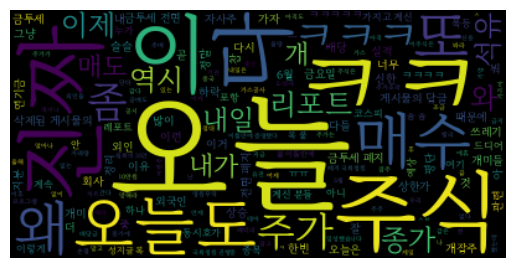

In [ ]:
# 한글 폰트 설정
wordcloud = WordCloud('MaruBuri-Regular.ttf').generate(' '.join(train_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()